In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from IVM import IVM
import warnings
warnings.filterwarnings('ignore')

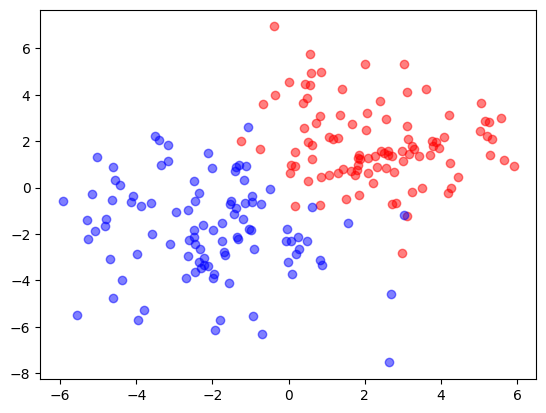

In [2]:
np.random.seed(611)

mu_1 = np.array([2, 2])
cov_1 = np.array([[3, -1], 
                  [-1, 3]])

mu_2 = np.array([-2, -2])
cov_2 = np.array([[4, -1], 
                  [-1, 4]])

X_1 = np.random.multivariate_normal(mean = mu_1, cov = cov_1, size = 100)
X_2 = np.random.multivariate_normal(mean = mu_2, cov = cov_2, size = 100)

plt.scatter(X_1[:, 0], X_1[:, 1], color = "red", alpha = 0.5)
plt.scatter(X_2[:, 0], X_2[:, 1], color = "blue", alpha = 0.5)

In [3]:
X = np.vstack((X_1, X_2))
y = np.vstack((np.zeros(shape = (X_1.shape[0], 1)), np.ones(shape = (X_2.shape[0], 1))))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 611)

In [4]:
lr = LogisticRegression(penalty="l2", multi_class="multinomial").fit(X_train, y_train)

In [5]:
svm = SVC(kernel = "rbf").fit(X_train, y_train)

In [6]:
print(f"Number of support vectors: {len(svm.support_vectors_)}")

Number of support vectors: 29


In [7]:
preds = svm.predict(X_test)

In [8]:
print("SVM: \n", classification_report(y_test, preds))

SVM: 
               precision    recall  f1-score   support

         0.0       1.00      0.96      0.98        26
         1.0       0.96      1.00      0.98        24

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



In [9]:
preds = lr.predict(X_test)
print("LR: \n", classification_report(y_test, preds))

LR: 
               precision    recall  f1-score   support

         0.0       1.00      0.96      0.98        26
         1.0       0.96      1.00      0.98        24

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



In [ ]:
ivm_model = IVM(kernel='rbf', lambda_=1e-3, top_k=5, max_sel=20, proxy_type='wald', verbose=True)
ivm_model.fit(X_train, y_train)
probs = ivm_model.predict_proba(X_test)
preds = ivm_model.predict(X_test)

Iter 1: idx 26, |S|=1, H=79.467898
Iter 2: idx 41, |S|=2, H=62.288277
Iter 3: idx 27, |S|=3, H=52.400041
Iter 4: idx 4, |S|=4, H=44.695612
Iter 5: idx 106, |S|=5, H=37.173539
Iter 6: idx 125, |S|=6, H=32.031048
Iter 7: idx 48, |S|=7, H=28.776162
Iter 8: idx 32, |S|=8, H=24.480497
Iter 9: idx 114, |S|=9, H=21.576279
Iter 10: idx 10, |S|=10, H=20.119323
Iter 11: idx 94, |S|=11, H=17.301256
Iter 12: idx 21, |S|=12, H=16.253767
Iter 13: idx 126, |S|=13, H=14.102539
Iter 14: idx 96, |S|=14, H=12.181130
Iter 15: idx 52, |S|=15, H=12.012571
Iter 16: idx 70, |S|=16, H=11.922783
Converged


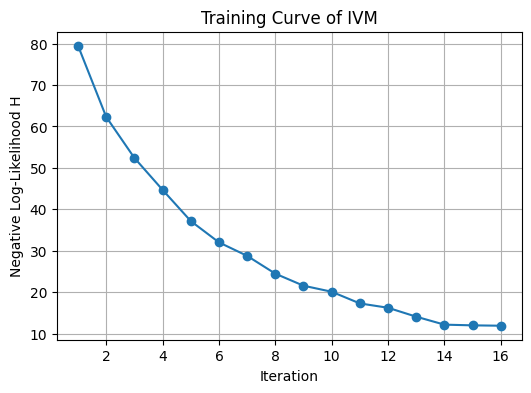

In [13]:
plt.figure(figsize=(6,4))
plt.plot(range(1, len(ivm_model.err_H)+1), ivm_model.err_H, marker='o')
plt.xlabel("Iteration")
plt.ylabel("Negative Log-Likelihood H")
plt.title("Training Curve of IVM")
plt.grid(True)
plt.show()

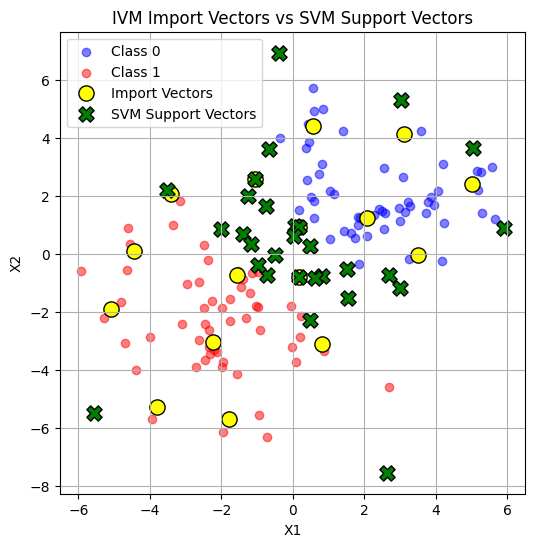

In [16]:
plt.figure(figsize=(6,6))

# Plot all points
plt.scatter(X_train[y_train.flatten()==0,0], X_train[y_train.flatten()==0,1], color='blue', alpha=0.5, label='Class 0')
plt.scatter(X_train[y_train.flatten()==1,0], X_train[y_train.flatten()==1,1], color='red', alpha=0.5, label='Class 1')

# Highlight selected import vectors
selected_X = X_train[ivm_model.S_idx]
plt.scatter(selected_X[:,0], selected_X[:,1], color='yellow', edgecolor='black', 
            s=120, label='Import Vectors')

# same for the support vectors selected earlier
plt.scatter(svm.support_vectors_[:,0], svm.support_vectors_[:,1], color='green', 
            edgecolor='black', s=120, marker='X', label='SVM Support Vectors')


plt.xlabel("X1")
plt.ylabel("X2")
plt.title("IVM Import Vectors vs SVM Support Vectors")
plt.legend()
plt.grid(True)
plt.show()


# **Under construction, check back later for multiclass IVM demos**

In [45]:
mu_1 = np.array([2, 2])
cov_1 = np.array([[1, 0], 
                  [0, 1]])

mu_2 = np.array([-2, -2])
cov_2 = np.array([[1, 0], 
                  [0, 1]])

mu_3 = np.array([5, -2])
cov_3 = np.array([[1, 0], 
                  [0, 1]])

X_1 = np.random.multivariate_normal(mean = mu_1, cov = cov_1, size = 50)
X_2 = np.random.multivariate_normal(mean = mu_2, cov = cov_2, size = 50)
X_3 = np.random.multivariate_normal(mean = mu_3, cov = cov_3, size = 50)
print(X_1.shape, X_2.shape, X_3.shape)

(50, 2) (50, 2) (50, 2)


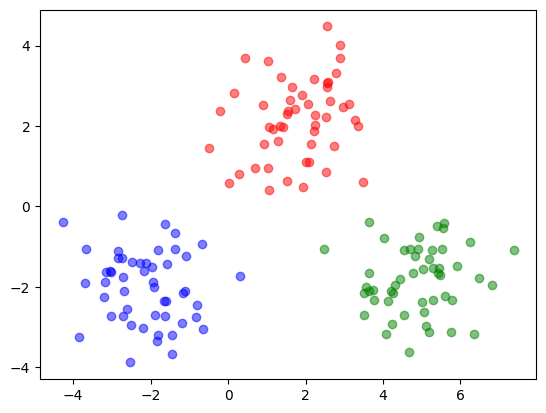

In [24]:
plt.scatter(X_1[:, 0], X_1[:, 1], color = "red", alpha = 0.5)
plt.scatter(X_2[:, 0], X_2[:, 1], color = "blue", alpha = 0.5)
plt.scatter(X_3[:, 0], X_3[:, 1], color = "green", alpha = 0.5)

In [46]:
X = np.vstack((X_1, X_2, X_3))
y = np.vstack((np.zeros(shape = (X_1.shape[0], 1)), np.ones(shape = (X_2.shape[0], 1)), 2*np.ones(shape = (X_3.shape[0], 1))))

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 611)

In [27]:
svm = SVC().fit(X_train, y_train)

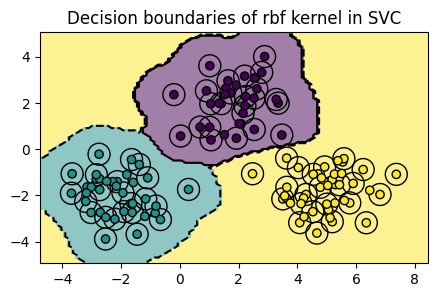

In [28]:
IVM.plot_training_data_with_decision_boundary("rbf", X_train, y_train)

In [29]:
print(f"Number of support vectors: {len(svm.support_vectors_)}")

Number of support vectors: 25


In [30]:
preds = svm.predict(X_test)
print("SVM: \n", classification_report(y_test, preds))

SVM: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        17
         1.0       1.00      1.00      1.00        13
         2.0       1.00      1.00      1.00         8

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [49]:
lr = LogisticRegression(penalty="l2", multi_class="multinomial").fit(X_train, y_train)
preds = lr.predict(X_test)
print("LR: \n", classification_report(y_test, preds))

LR: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        17
         1.0       1.00      1.00      1.00        13
         2.0       1.00      1.00      1.00         8

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [31]:
np.random.seed(611)
preds = []
num_import_vecs = []

for x in X_test:
    probs = []
    for i in [0, 1, 2]:
        y_train_recode = np.where(y_train == i, 1, 0)
        y_test_recode = np.where(y_test == i, 1, 0)
        import_vectors, loss_func, optimal_a = IVM.fit_rbf(X_train, y_train_recode)
        p = IVM.predict_one_rbf_multiclass(optimal_a, import_vectors, x)
        print("p: ", p)
        probs.append(p)
        num_import_vecs.append(len(np.array(import_vectors).reshape(-1, 2)))
    print("max prob: ", np.argmax(np.array(probs)))
    preds.append(np.argmax(np.array(probs)))

S:  1 R:  111
S:  2 R:  110
S:  3 R:  109
S:  4 R:  108
S:  5 R:  107
S:  6 R:  106
S:  7 R:  105
S:  8 R:  104
S:  9 R:  103
S:  10 R:  102
S:  11 R:  101
S:  12 R:  100
S:  13 R:  99
S:  14 R:  98
S:  15 R:  97
S:  15 R:  97 a:  [[-1.00977144]
 [-2.39919914]
 [ 1.86969031]
 [ 1.55647577]
 [ 1.40692221]
 [-1.41867478]
 [-0.69080231]
 [-1.25300155]
 [-1.35406944]
 [-1.01409135]
 [-0.89328097]
 [-1.4317908 ]
 [-1.19084735]
 [-1.08780855]
 [ 0.58866297]]
p:  [0.78137098]
S:  1 R:  111
S:  2 R:  110
S:  3 R:  109
S:  4 R:  108
S:  5 R:  107
S:  6 R:  106
S:  7 R:  105
S:  8 R:  104
S:  9 R:  103
S:  10 R:  102
S:  11 R:  101
S:  12 R:  100
S:  13 R:  99
S:  13 R:  99 a:  [[-2.1761312 ]
 [ 2.40958492]
 [-1.69204431]
 [-1.55592611]
 [-1.47500697]
 [-1.75368538]
 [-1.53714619]
 [ 1.24879284]
 [ 1.35810517]
 [-1.402615  ]
 [ 1.01312182]
 [ 0.82956747]
 [-0.63176732]]
p:  [0.21690138]
S:  1 R:  111
S:  2 R:  110
S:  3 R:  109
S:  4 R:  108
S:  5 R:  107
S:  6 R:  106
S:  7 R:  105
S:  8 R:  10

In [37]:
print("IVM: \n", classification_report(y_test, preds))

IVM: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        17
         1.0       1.00      1.00      1.00        13
         2.0       1.00      1.00      1.00         8

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [34]:
print(f"Number of import vectors: {np.mean(num_import_vecs)}")

Number of import vectors: 14.0


Average number of import vectors in OvR IVM: 14

Average number of support vectors in OvR SVM: 26